In [17]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Run before importing KMeans

import os
os.environ["OMP_NUM_THREADS"] = '1'

# I will now use the read_csv function in the pandas library to read our Mall_Customers.csv dataset into a padas Dataframe

In [18]:
# Importing the dataset

dataset = pd.read_csv('Mall_Customers.csv')

In [19]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Since we have more numerical values, we can use the pairplot() fun ction in Seaborn to get a series of scatterplots for each pair of variables also an histogram


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


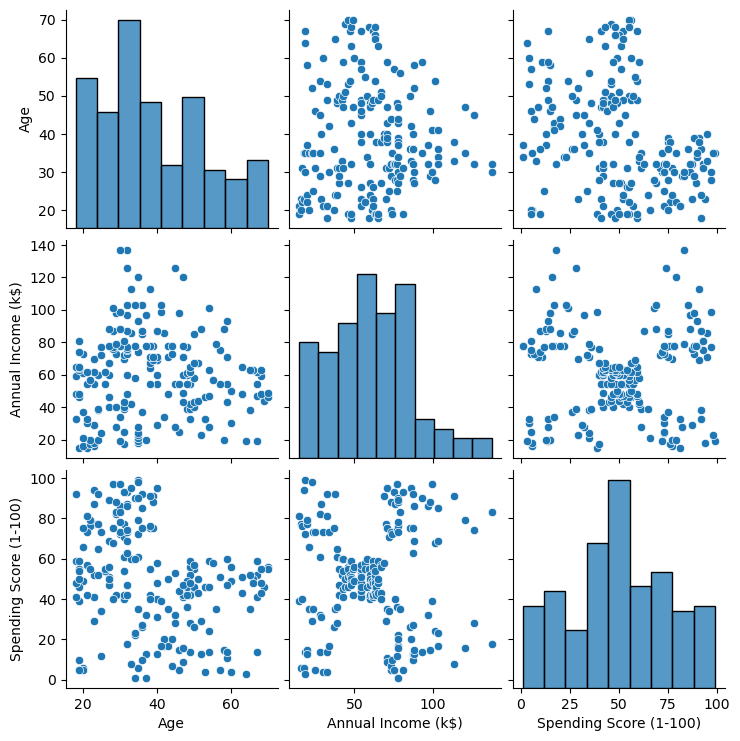

In [20]:
sns.pairplot(dataset.iloc[:,[2,3,4]])

# The scatterplot of spending score against Annual Income roughly form five clusters

WE APPLY MIN-MAX SCALING OR NORMALISATION BEOFRE CARRYING OUT CLUSTERING

In [8]:
from sklearn.preprocessing import StandardScaler
x = dataset.iloc[:, [3,4]].values
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

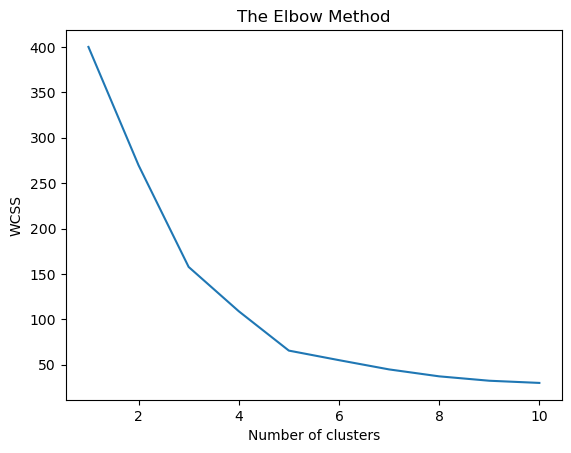

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state =42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

# Now that we have identified the optimal number of clusters, we can use the fit_predict() method to train a KMeans() method on the dataset and return array y_kmeans

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


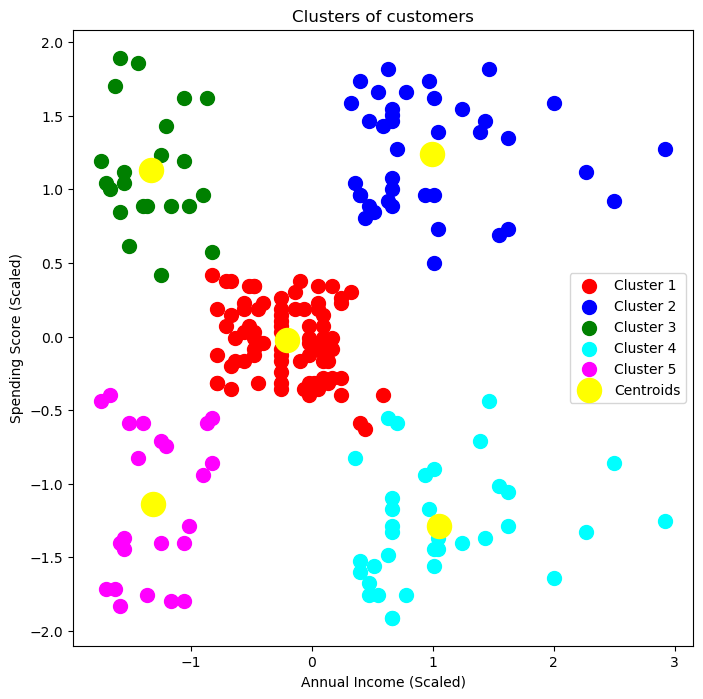

In [28]:
# visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()




